![StatModels](https://www.durhamtech.edu/themes/custom/durhamtech/images/durham-tech-logo-web.svg) 

## Applications - Statistical Modeling: Regression

This lecture provides foundational knowledge and examples of machine learning modeling concepts by examining stock price data.  Here we are focusing mostly on regression models.

---

# Table of Contents

### Jupyter Overview
#### <a href='#1'>Introduction</a>
* Classification
* Regression

#### <a href='#2'>Data Sources</a>
#### <a href='#3'>What is scikit-learn (sklearn)</a>
#### <a href='#4'>What is Regression?</a>
#### <a href='#5'>Create Our Functions</a>
* Split our data into train/test
* Use Statsmodel API functions to build a simple Regression model
* Use Sklearn to create Lasso Regression model

#### <a href='#6'>Linear Regression Model</a>
#### <a href='#7'>Lasso Regression Model</a>
#### <a href='#8'>Multicollinearity</a>
#### <a href='#9'>Regression Models Take 2</a>
#### <a href='#40'>Interpretation and Overfitting</a>
#### <a href='#10'>Collinearity Check 2</a>
#### <a href='#55'>Weekly Readings/Videos</a>

------------------------------------------------------------------------

#### <a href='#11'>Advanced Regression Machine Learning Models</a>
#### <a href='#12'>Save Modified Dataset</a>
#### <a href='#56'>Extra Practice</a>

<a id='1'></a>
## Introduction

### Predictive machine learning models perform two types of tasks:

* __CLASSIFICATION__:

LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.

Eg: We train our model using income and expenditure data of bank customers using  __defaulter or non-defaulter__ as labels. When we input income and expenditure data  of any customer in this model, it will predict whether the customer is going to default or not.

* __REGRESSION__:

LABELS ARE CONTINUOUS VALUES.

Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.

Eg: We train our model using income and expenditure data of bank customers using  __default amount__ as the label. This model when input with income and expenditure data of any customer will be able to predict the default amount the customer might end up with.


<code style="background:yellow;color:black">...We are focusing today on regression models...</code>

<a id='2'></a>
## Data Sources

1. SP 500 Components: https://datahub.io/core/s-and-p-500-companies
2. SP 500 Company Info: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
3. TD Ameritrade Data Dicitionary https://developer.tdameritrade.com/content/streaming-data#_Toc504640567
4. Yahoo Finance: https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC
5. Weather: https://www.weather.gov/wrh/climate?wfo=okx
6. FRED https://fred.stlouisfed.org/docs/api/fred/series.html

In [1]:
import requests
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

<a id='3'></a>
## What is scikit-learn (sklearn)?

* Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python

* This library is built upon SciPy (Scientific Python) another package you can load in

* The library is focused on modeling data. It is not focused on loading, manipulating and summarizing data -> use pandas for that!

* We can do supervised and unsupervised learning with Scikit-learn

* Train and test splits made easy with their pre-made function

In [2]:
# Load in data we created in the Data Cleaning notebook

yahoo_data=pd.read_csv('Data/yahoo_data.csv', index_col=0)
yahoo_data

,open,close,prec,temp,DFF,UNRATE,GDPC1,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
252,0.000000,74.739998,2.31,31.2,3.50,5.5,3774.264,4.527619e+06,9.241526e+05,69.365952,3.210835,3.876007e+03,0.041184,83.550003
253,0.000000,74.629997,2.31,31.2,3.50,5.5,3774.264,4.535000e+06,9.215726e+05,69.414246,3.199715,3.815290e+03,0.041045,83.900002
254,0.000000,74.400002,2.31,31.2,3.50,5.5,3774.264,4.544563e+06,9.242278e+05,69.462897,3.185355,3.863518e+03,0.040868,84.290001
255,0.000000,74.279999,2.31,31.2,3.50,5.5,3774.264,4.547698e+06,9.224173e+05,69.511825,3.165982,3.763152e+03,0.040631,84.379997
256,0.000000,73.809998,2.31,31.2,3.50,5.5,3774.264,4.550079e+06,9.217721e+05,69.558254,3.149671,3.716120e+03,0.040423,84.330002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14543,3226.139893,3246.590088,3.94,68.8,0.09,7.8,18560.774,4.650244e+09,1.464733e+09,3092.189362,246.356374,6.489758e+06,0.868322,4455.479980
14544,3236.659912,3298.459961,3.94,68.8,0.09,7.8,18560.774,4.655326e+09,1.462315e+09,3093.227933,246.453794,6.358687e+06,0.872673,4443.109863
14545,3333.899902,3351.600098,3.94,68.8,0.09,7.8,18560.774,4.658163e+09,1.459933e+09,3094.501107,246.682806,6.127766e+06,0.881020,4352.629883
14546,3350.919922,3335.469971,3.94,68.8,0.09,7.8,18560.774,4.660950e+09,1.457891e+09,3096.047973,247.069186,5.926572e+06,0.892627,4359.459961


In [3]:
# Correlation between close and open
print("Correlation between close and open:",yahoo_data['close'].corr(yahoo_data['open']))

# Save the data in these columns for later use
close_data=yahoo_data['close']
close_future_data=yahoo_data['close_future']

# Drop the column 'close' since it's well correlated with 'open'
yahoo_data.drop(columns=['close'],inplace=True)

# Summary statistics, rounded to 2 decimals places
yahoo_data.describe().round(2)

Correlation between close and open: 0.9988467937963423


,open,prec,temp,DFF,UNRATE,GDPC1,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
count,14296.00,14296.00,14296.00,14296.00,14296.00,14296.00,1.429600e+04,1.429600e+04,14296.00,14296.00,14296.00,14296.00,14296.00
mean,740.93,4.12,55.46,5.10,6.01,10575.44,1.203655e+09,2.461167e+08,745.32,41.80,349972.04,0.21,841.66
std,820.90,2.37,15.74,3.77,1.73,4614.52,1.631313e+09,3.657195e+08,761.19,45.34,2286664.93,0.61,896.09
min,0.00,0.18,22.00,0.04,3.40,3774.26,4.527619e+06,6.985104e+05,69.37,1.73,-12363322.09,-3.12,62.28
25%,0.00,2.43,40.90,1.98,4.80,6333.85,2.115281e+07,6.718421e+06,102.66,5.89,-10277.66,-0.01,108.39
50%,412.87,3.71,55.20,5.05,5.70,9643.89,1.884113e+08,4.154389e+07,394.67,20.56,27158.75,0.09,446.19
75%,1254.69,5.26,70.60,6.93,7.20,15216.65,2.223757e+09,3.506268e+08,1229.11,72.43,377601.21,0.47,1285.61
max,3564.74,18.95,81.40,22.36,14.80,19202.31,6.093193e+09,1.607984e+09,3097.47,247.41,14099845.55,2.02,4536.95


In [4]:
# Look into the dataset characteristics, check for feature type - categorical or numerical.
yahoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14296 entries, 252 to 14547
Data columns (total 13 columns):
open                 14296 non-null float64
prec                 14296 non-null float64
temp                 14296 non-null float64
DFF                  14296 non-null float64
UNRATE               14296 non-null float64
GDPC1                14296 non-null float64
volume_moving        14296 non-null float64
volume_moving_std    14296 non-null float64
close_moving         14296 non-null float64
close_moving_std     14296 non-null float64
volume_slope         14296 non-null float64
close_slope          14296 non-null float64
close_future         14296 non-null float64
dtypes: float64(13)
memory usage: 1.5 MB


<a id='4'></a>
## What is Regression?

https://www.youtube.com/watch?v=iIUq0SqBSH0

__Linear regression__ is a predictive modeling technique for predicting a numeric response variable based on features.  In short - how do variables X1, X2,...,Xn affect Y and by how much?

"Linear" in the name linear regression refers to the fact that this method fits a model where response bears linear relationship with features. (ie Y is proportional to first power of X)  

The coefficients b1,b2,...,bn refer to how much the variable they are connected to impacts Y.  

__Y^ = b0 + b1(X1) + b2(X2) +.... + bn(Xn) where:__   
Y^: predicted response  
b0: the y intercept  
b1,b2,...,bn: Coefficients of X1,X2,...,Xn 

![image.png](https://knowledge.dataiku.com/latest/_images/simple-linear-regression1.png)
![image.png](https://knowledge.dataiku.com/latest/_images/simple-linear-regression2.png)
![image.png](https://knowledge.dataiku.com/latest/_images/simple-linear-regression4.png)
source: https://knowledge.dataiku.com/latest/courses/intro-to-ml/regression/regression-summary.html

If Y is the actual response and Y^ is the predicted response,    
__Y-Y^= Residual__  
Average Residual defines model performance... if the residual equal to zero represents a perfect fit model (no difference between actual and predicted).

<a id='5'></a>
## Create Our Functions

### Split our data into train/test

In order to check the validity of our trained model, we keep a part of our dataset hidden from the model during training, called  __Test set__.

Test data labels are predicted using the trained model and compared with the actual labels of the data. This gives us the idea about how well the model can be trusted for its predictive power.

* __Training set__ : The sample of data used to fit your model.

* __Test set__ : The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. 

![image.png](Images/test_train.png)

### Use Statsmodel API functions to build a simple Regression model
Sklearn also has a package that allows creation of a Regression model but does not have a nice summary results output.

### Use Sklearn to create Lasso Regression model
This creates a regularized version of a simple Regression model.

In [5]:
def data_split(df,y_var,scale=False):
    """This function splits our data into a training and test set as well as returns the columns for use
    in other functions.  The scale variable is defaulted to false but can be changed if we need to normalize
    the data."""
    reg_df=df.copy()
    
    # train test split -> This is the usual way however not what we are using.
    #y=reg_df.pop(y_var)
    #X=reg_df
    #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    
    # first 80% of the rows goes to training, the last 20% for testing.  Not randomized!
    x_train = reg_df.head(int(len(reg_df)*(0.8)))
    x_test = reg_df.iloc[max(x_train.index):]
    y_train = x_train.pop(y_var)
    y_test = x_test.pop(y_var)
    
    colz=x_train.columns
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    # Normalizes the features i.e. each column of X, INDIVIDUALLY, so that 
    # each column/feature/variable will have μ (the mean) = 0 and σ (the standard deviation) = 1.
    if scale:
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        
    return x_train, x_test, y_train, y_test, colz

def regression(x_train, x_test, y_train, y_test, colz):

    print("Number of training records:", len(y_train))
    print("Number of testing records:",len(y_test))

    print('\nLinear Regression Results')
    X2 = sm.add_constant(x_train)
    est = sm.OLS(y_train, x_train)
    regr = est.fit()
    print(regr.summary())
    
    y_pred = regr.predict(x_test)
    test_acc=r2_score(y_test, y_pred)
    print('\nTest accuracy =',test_acc)
    
    
def lasso(x_train, x_test, y_train, y_test, colz, lambda_co=1, printer=True):
    lasso = linear_model.Lasso(alpha=lambda_co)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    train_acc = lasso.score(x_train, y_train)
    test_acc = lasso.score(x_test, y_test)
    
    if printer:
        # The coefficients
        print('\nCoefficients:')
        for x,y in zip(colz,lasso.coef_):
            print(x,y)
        print('\n')
    
    print('Lasso Regression Results:')
    print('Training acuracy =',train_acc)
    print('Test accuracy =',test_acc)

In [6]:
# Split data using yahoo_data
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'close_future')

<a id='6'></a>
## Linear Regression Model
![FunnyReg](https://memegenerator.net/img/instances/49880835.jpg)

In [7]:
# Fit model with known training data to best prepare your model for unknown data.
# Calculate training error, this gives you the idea of bias in your model.

# Note the multicollinearity issue at the bottom!!!!
regression(x_train, x_test, y_train, y_test, colz)

Number of training records: 11436
Number of testing records: 2609

Linear Regression Results
                                 OLS Regression Results                                
Dep. Variable:           close_future   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.432e+04
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                        0.00
Time:                        08:22:38   Log-Likelihood:                         -68698.
No. Observations:               11436   AIC:                                  1.374e+05
Df Residuals:                   11424   BIC:                                  1.375e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coe

<a id='7'></a>
## Lasso Regression Model

https://www.youtube.com/watch?v=qU1_cj4LfLY

Lasso (Least Absolute Shrinkage and Selection Operator) Regression not only uses the fundamental concept of Linear Regression which involves properly tuned selection of weights that improve the reliability of a prediction, but also has another constraint to abide.  It uses the L1 norm.

![image.png](https://miro.medium.com/max/1400/1*9HafC8pwsP6o1GmPc1szcQ.png)

We see the introduction of a new parameter λ (lambda). The value of λ controls the degree of regularization. A high value of λ means higher degree of regularization; simpler model; more weights having the value equal to zero. The case where λ=0, the Lasso model becomes equivalent to the simple linear model. Default value of λ is 1. λ is referred as alpha in sklearn linear models.

source: https://medium.com/analytics-vidhya/lasso-and-ridge-the-regularized-linear-regression-2d85384badf3

In [8]:
# Fit model with known training data to best prepare your model for unknown data.
# Calculate training error, this gives you the idea of bias in your model.

# Test out different lambda coefficients below first then print out the results from the best fit.
for l in [0.5,1,949,1000]:
    print('Lambda at',l)
    lasso(x_train, x_test, y_train, y_test, colz, lambda_co=l, printer=False)
    print('\n')
print('--------------------------------')

# Note the 0ed out columns below!!!
print('Lambda at 949:')
lasso(x_train, x_test, y_train, y_test, colz, lambda_co=949)

Lambda at 0.5
Lasso Regression Results:
Training acuracy = 0.9560869924214415
Test accuracy = -0.2812284640820242


Lambda at 1
Lasso Regression Results:
Training acuracy = 0.9560299838665184
Test accuracy = -0.294825560885031


Lambda at 949
Lasso Regression Results:
Training acuracy = 0.933864614867676
Test accuracy = 0.3629206184335735


Lambda at 1000
Lasso Regression Results:
Training acuracy = 0.933846666521025
Test accuracy = 0.35969474113065414


--------------------------------
Lambda at 949:

Coefficients:
open 0.7197076607815599
prec 0.0
temp -0.0
DFF -0.0
UNRATE -0.0
GDPC1 0.03138907253066221
volume_moving 1.8612182313947077e-08
volume_moving_std -2.414342371948731e-07
close_moving 0.0
close_moving_std 0.0
volume_slope 9.667112184170969e-06
close_slope 0.0


Lasso Regression Results:
Training acuracy = 0.933864614867676
Test accuracy = 0.3629206184335735


<a id='8'></a>
## Multicollinearity

Multicollinearity is when more than two explanatory variables in a regression model are highly linearly related.  Basically this means that two variables basically are very similiar and explain the same thing.  This causes problems when intepreting the model and breaks a basic assumption of any type of linear regression.

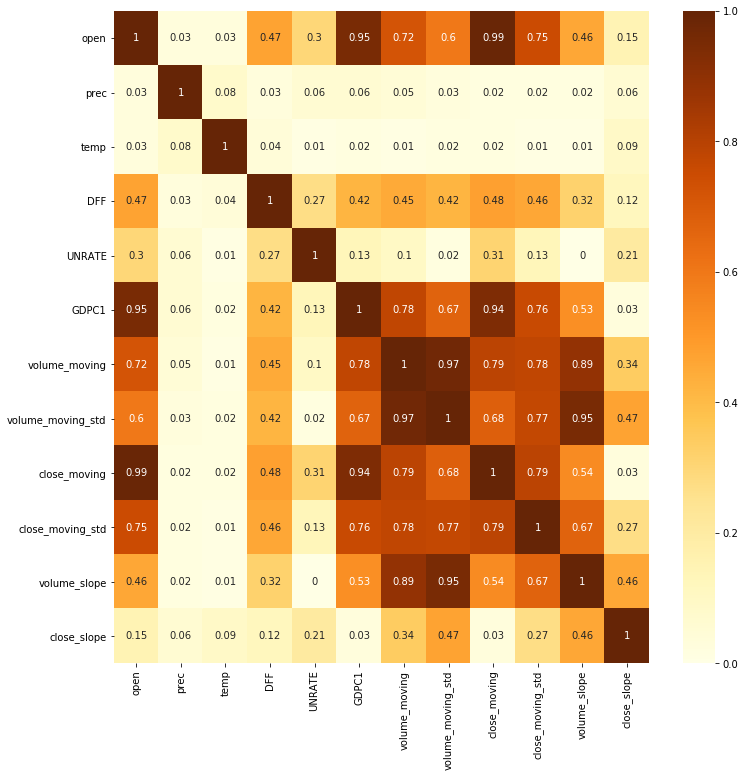

In [9]:
plt.figure(figsize=(12, 12))
corr = x_train.corr().round(2).abs()
sb.heatmap(corr, cmap="YlOrBr", annot=True)

In [10]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Dropping these columns:",to_drop)

# Drop features 
yahoo_data2=yahoo_data.drop(to_drop, axis=1)

Dropping these columns: ['GDPC1', 'volume_moving_std', 'close_moving', 'volume_slope']


<a id='9'></a>
## Regression Models Take 2

In [11]:
# Resplit the data, this time using yahoo_data2
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data2,'close_future')

# Run Regression model again on the new split data
regression(x_train, x_test, y_train, y_test, colz)

Number of training records: 11436
Number of testing records: 2609

Linear Regression Results
                                 OLS Regression Results                                
Dep. Variable:           close_future   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          5.088e+04
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                        0.00
Time:                        08:22:40   Log-Likelihood:                         -70193.
No. Observations:               11436   AIC:                                  1.404e+05
Df Residuals:                   11428   BIC:                                  1.405e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef

<a id='40'></a>
## Interpretation and Overfitting

![img](https://miro.medium.com/max/2000/1*N1-K-A43_98pYZ27fnupDA.jpeg)
source: https://towardsdatascience.com/linear-regression-explained-1b36f97b7572

#### Overfitting
Overfitting occurs when a statistical model is too attuned and fits too tightly to its training data to a degree that's detrimental towards generalization. This happens when the model memorizes the noise, outliers, and specifics that belong to the training data.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1200px-Overfitting.svg.png)

In [12]:
# Fit model with known training data to best prepare your model for unknown data.
# Calculate training error, this gives you the idea of bias in your model.

for l in [0.5,1,949,1000]:
    print('Lambda at',l)
    lasso(x_train, x_test, y_train, y_test, colz, lambda_co=l, printer=False)
    print('\n')
print('--------------------------------')
print('Lambda at 949:')
lasso(x_train, x_test, y_train, y_test, colz, lambda_co=949)

Lambda at 0.5
Lasso Regression Results:
Training acuracy = 0.9448138213601252
Test accuracy = 0.6051999954153747


Lambda at 1
Lasso Regression Results:
Training acuracy = 0.9447818531621877
Test accuracy = 0.6036516494391534


Lambda at 949
Lasso Regression Results:
Training acuracy = 0.9306593135025678
Test accuracy = 0.6202066612861367


Lambda at 1000
Lasso Regression Results:
Training acuracy = 0.9306554245656103
Test accuracy = 0.6198638925491338


--------------------------------
Lambda at 949:

Coefficients:
open 0.9149424660485517
prec 0.0
temp -0.0
DFF -0.0
UNRATE -0.0
volume_moving -6.304228772482669e-09
close_moving_std 0.0
close_slope 0.0


Lasso Regression Results:
Training acuracy = 0.9306593135025678
Test accuracy = 0.6202066612861367


<a id='10'></a>
## Collinearity Check 2

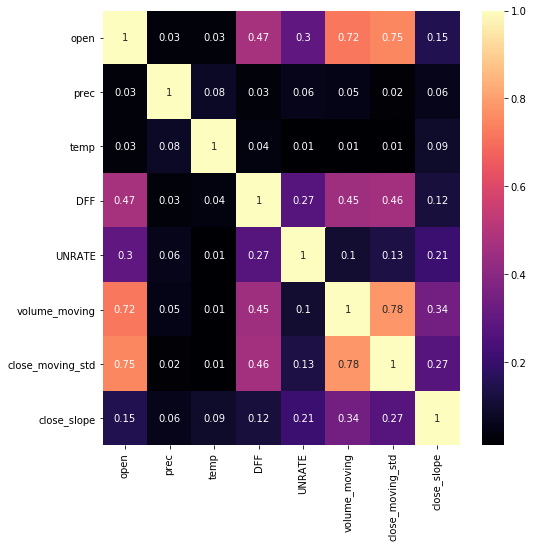

In [13]:
plt.figure(figsize=(8, 8))
corr = x_train.corr().round(2).abs()
sb.heatmap(corr, cmap="magma", annot=True)

In [14]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Dropping these columns:",to_drop)

Dropping these columns: []


<a id='55'></a>
# Weekly Readings/Videos

https://techhq.com/2021/09/next-looks-can-ai-technology-predict-the-future-of-fashion/

https://radiichina.com/an-ai-designer-just-won-runner-up-in-a-major-fashion-design-competition/

https://data-flair.training/blogs/data-science-at-netflix/

<a id='11'></a>
## Advanced Regression Machine Learning Models

The information below here is solely for your own use as a code template.  

In [15]:
def random_forest(x_train, x_test, y_train, y_test, colz, cat=False, est=10):
    # If continous y variable
    random_forest = RandomForestRegressor(n_estimators=est)
    
    # If categorical y variable
    if cat:
        random_forest = RandomForestClassifier(n_estimators=est)
    
    random_forest.fit(x_train, y_train)
    train_acc = random_forest.score(x_train, y_train)
    test_acc = random_forest.score(x_test, y_test)
    
    y_pred = random_forest.predict(x_test)
    
    print('Random Forest Results:')
    
    print('Training acuracy= ',train_acc)
    print('Test accuracy= ',test_acc)

    features = x_train.columns
    importances = random_forest.feature_importances_
    indices = np.argsort(importances)

    plt.subplots(figsize=(15, 11))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def cart(x_train, x_test, y_train, y_test, colz, cat=False):
    # if continuous variable
    cart = DecisionTreeRegressor(random_state=12)
    if cat:
        cart = DecisionTreeClassifier(random_state=12)
    cart.fit(x_train, y_train)
    train_acc = cart.score(x_train, y_train)
    test_acc = cart.score(x_test, y_test)
    
    y_pred = cart.predict(x_test)
    
    print('CART Results:')
    
    print('CART training acuracy= ',train_acc)
    print('CART test accuracy= ',test_acc)

Random Forest Results:
Training acuracy=  0.9999051612607296
Test accuracy=  -3.0287017170545765


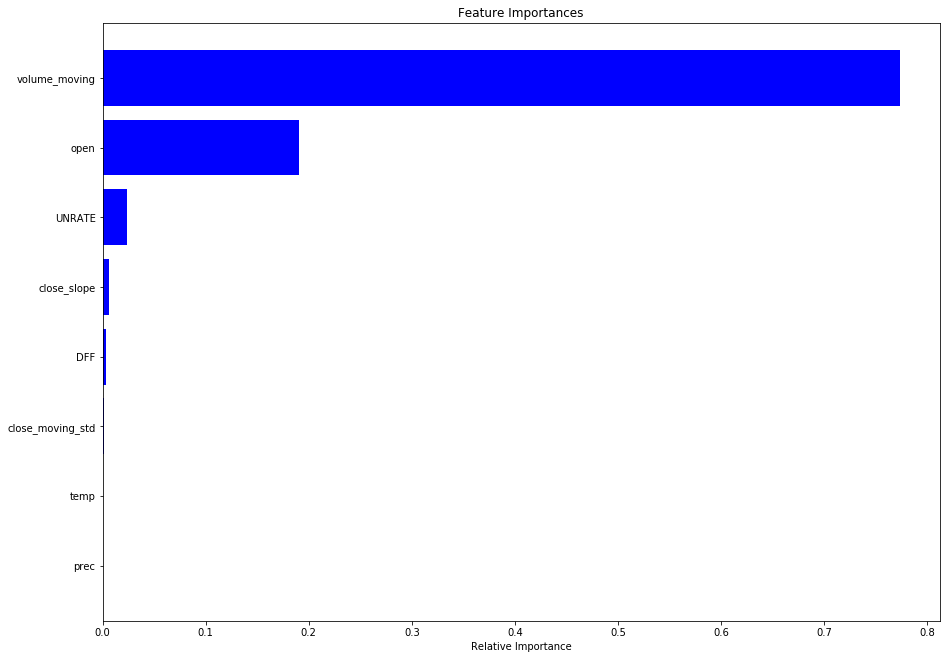

In [16]:
random_forest(x_train, x_test, y_train, y_test, colz)

In [17]:
cart(x_train, x_test, y_train, y_test, colz)

CART Results:
CART training acuracy=  1.0
CART test accuracy=  -2.9963926455883563


<a id='12'></a>
## Save Modified Dataset

In [18]:
yahoo_data2['close']=close_data
yahoo_data2['close_future']=close_future_data
yahoo_data2.to_excel('Data/yahoo_data2.xlsx')

<a id='56'></a>
# Extra Practice